## Importing the libraries

In [10]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from zipfile import ZipFile

## Importing the dataset

In [8]:
# Extract the dataset
dataset = 'C:\\Users\\Akhil Pillai\\Desktop\\ML PROJECTS\\Face-Mask-Detection-CNN\\face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall()
    print('The dataset is extracted.')

The dataset is extracted.


In [9]:
# Paths for with-mask and without-mask images
with_mask_path = "data/with_mask"
without_mask_path = "data/without_mask"

In [8]:
# Load file names
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

In [9]:
print(f"Number of with-mask images: {len(with_mask_files)}")
print(f"Number of without-mask images: {len(without_mask_files)}")

Number of with-mask images: 3725
Number of without-mask images: 3828


In [10]:
# Creating labels
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)
labels = with_mask_labels + without_mask_labels

In [11]:
# Load images and resize them
def load_images(image_files, image_path, target_size=(128, 128)):
    images = []
    for img_file in image_files:
        img = Image.open(os.path.join(image_path, img_file))
        img = img.resize(target_size).convert('RGB')
        images.append(np.array(img))
    return images

In [12]:
with_mask_data = load_images(with_mask_files, with_mask_path)
without_mask_data = load_images(without_mask_files, without_mask_path)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
# Combine data and labels
data = np.array(with_mask_data + without_mask_data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (7553, 128, 128, 3)
Labels shape: (7553,)


## Train test split

In [14]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (6042, 128, 128, 3), Test shape: (1511, 128, 128, 3)


In [15]:
# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

## CNN Model

In [11]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## Compiling the model

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the model

In [18]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.7462 - loss: 0.5281 - val_accuracy: 0.8848 - val_loss: 0.2692
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9033 - loss: 0.2463 - val_accuracy: 0.9391 - val_loss: 0.1786
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9321 - loss: 0.1754 - val_accuracy: 0.9338 - val_loss: 0.1723
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9501 - loss: 0.1345 - val_accuracy: 0.9543 - val_loss: 0.1460
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9679 - loss: 0.0896 - val_accuracy: 0.9464 - val_loss: 0.1685
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9760 - loss: 0.0681 - val_accuracy: 0.9550 - val_loss: 0.1447
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9804 - loss: 0.0550 - val_accuracy: 0.9543 - val_loss: 0.1484
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9892 - loss: 0.0387 - val_ac

## Plotting the metrics

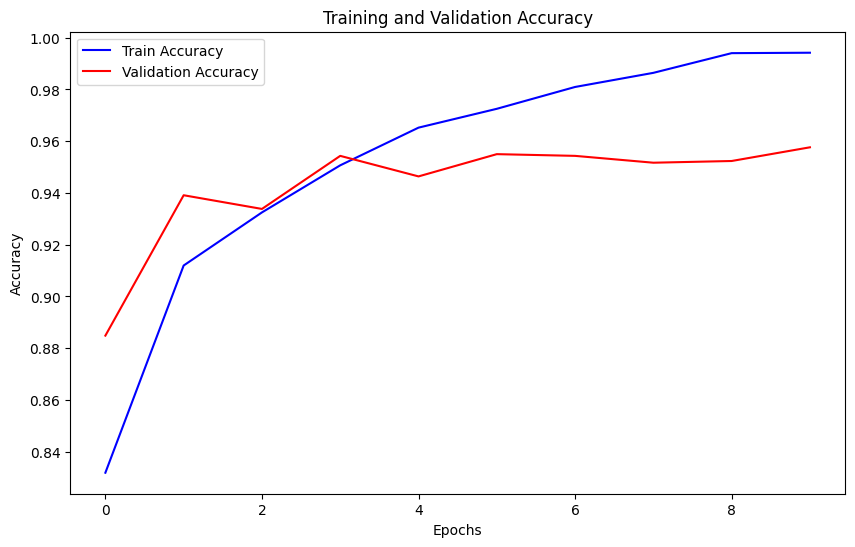

In [19]:
# Plot the training and validation accuracy (optional)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

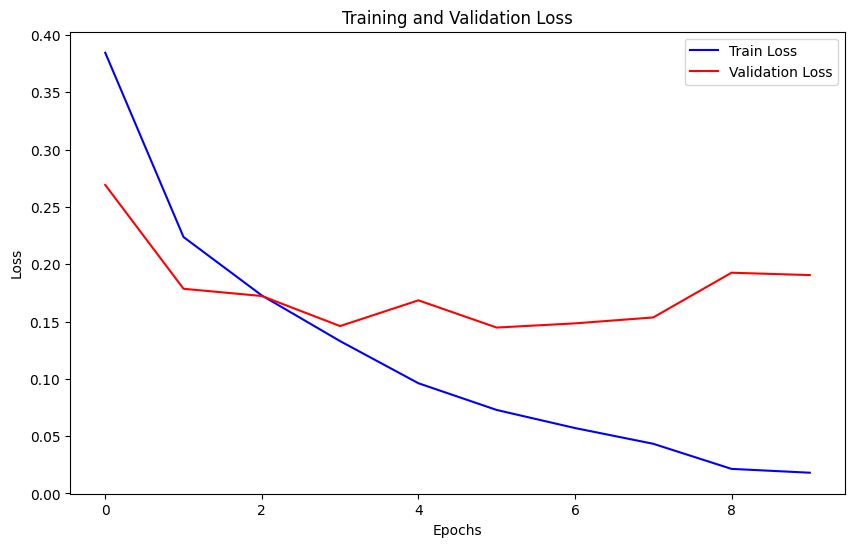

In [20]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


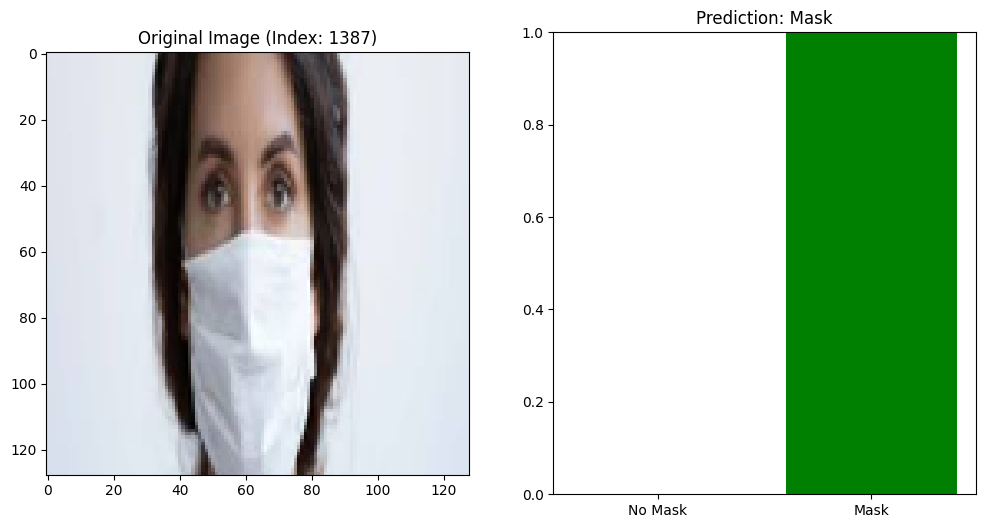

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


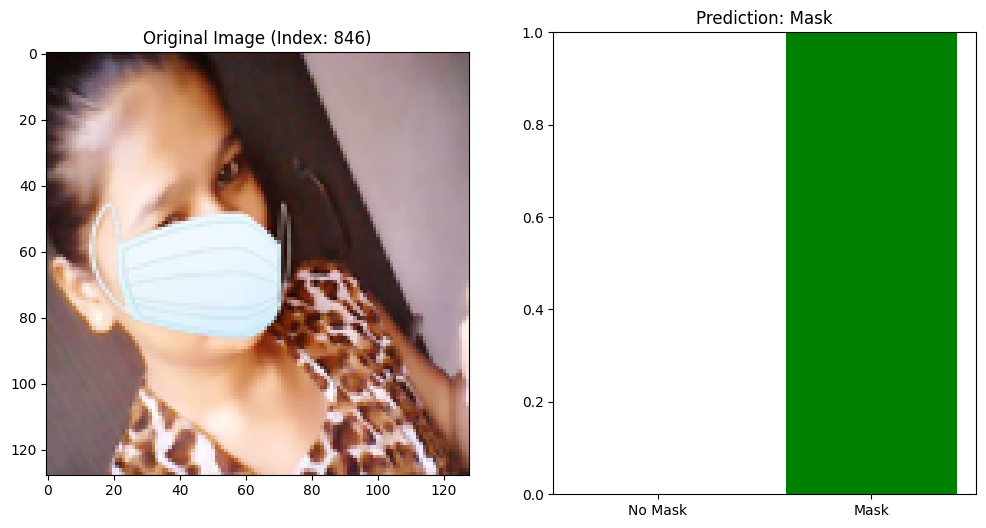

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


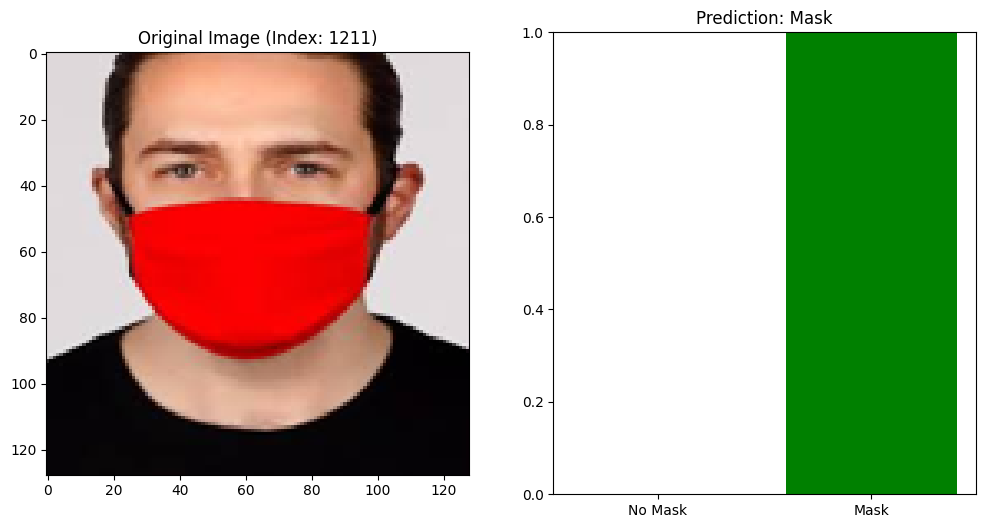

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


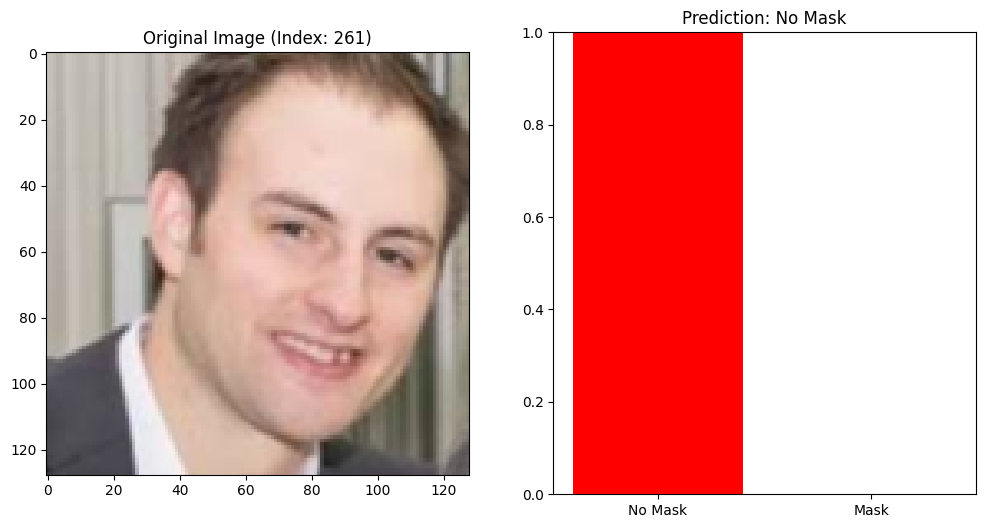

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


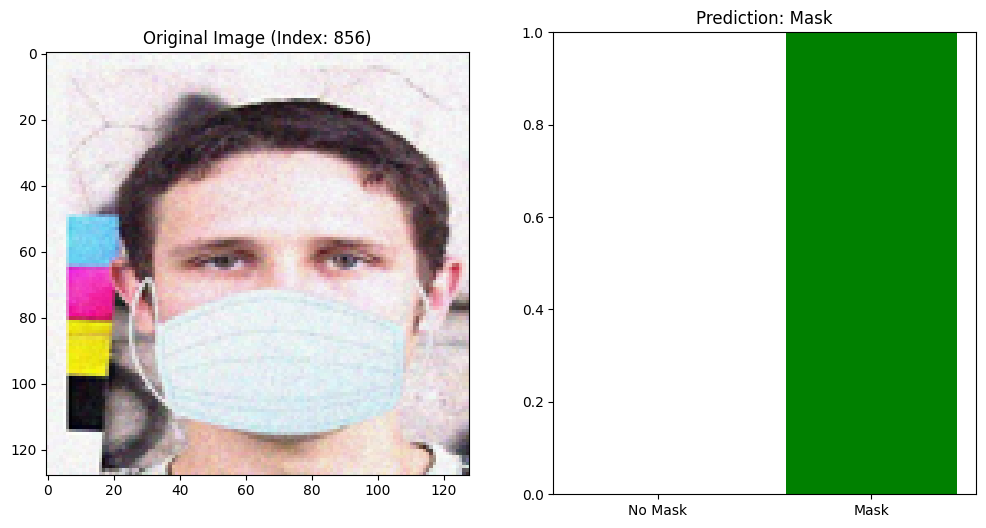

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


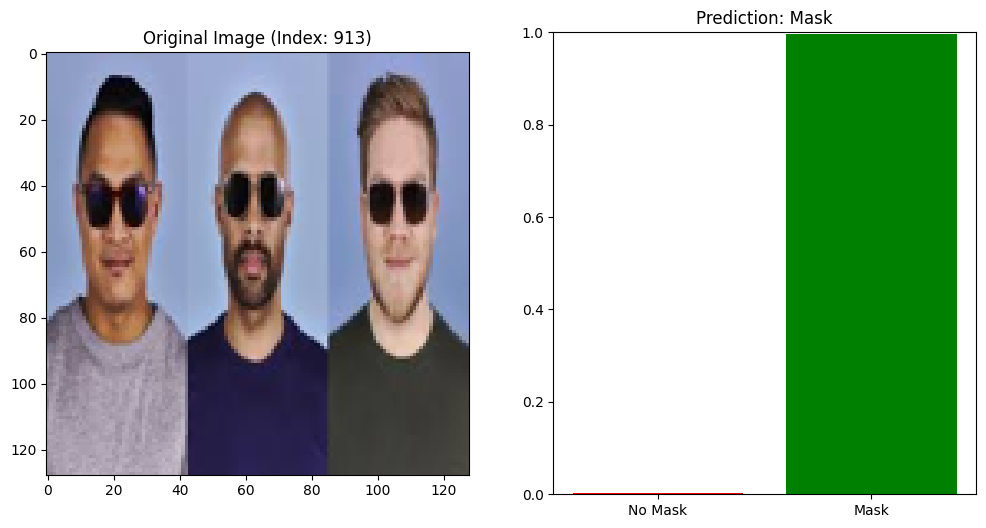

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


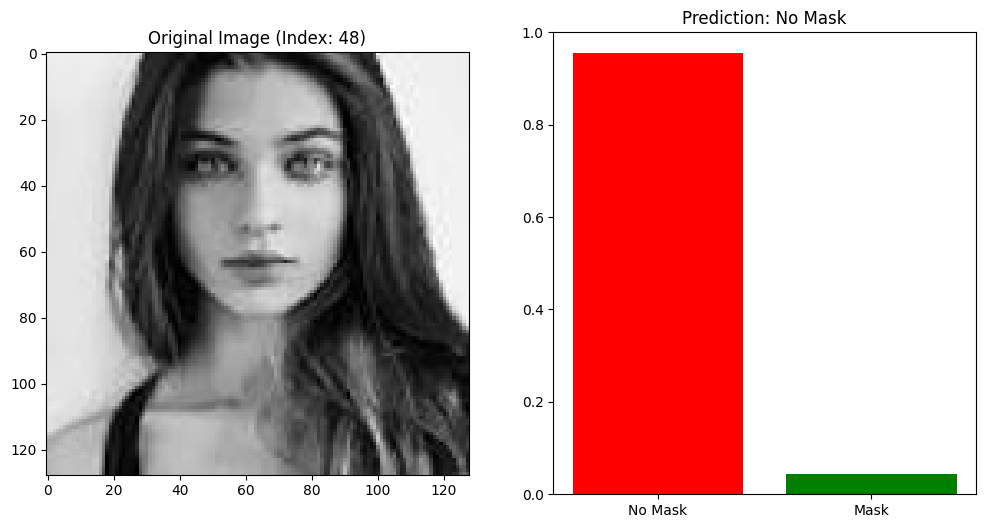

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


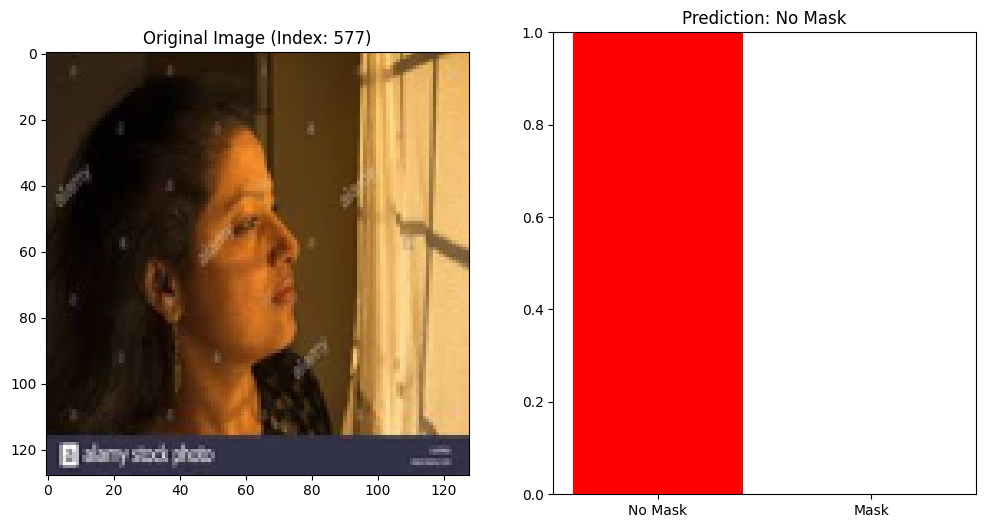

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


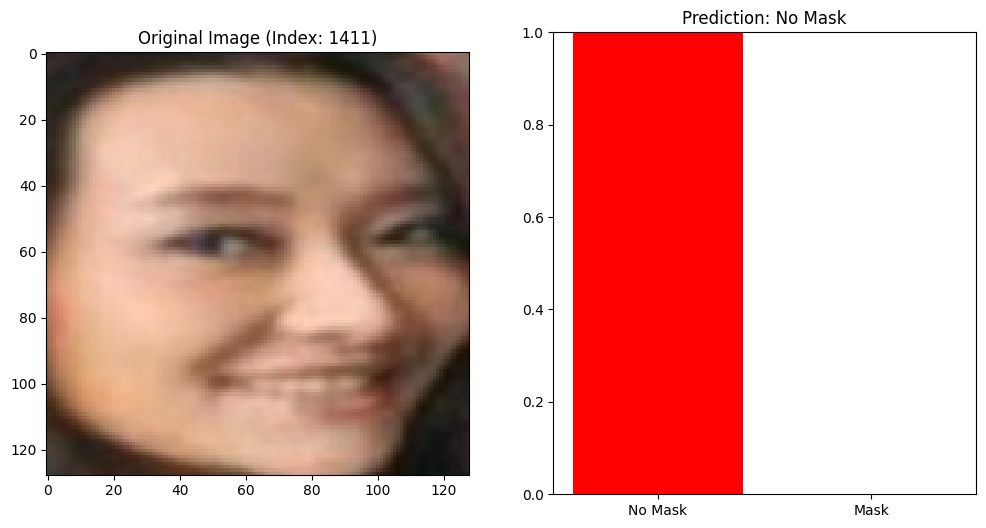

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


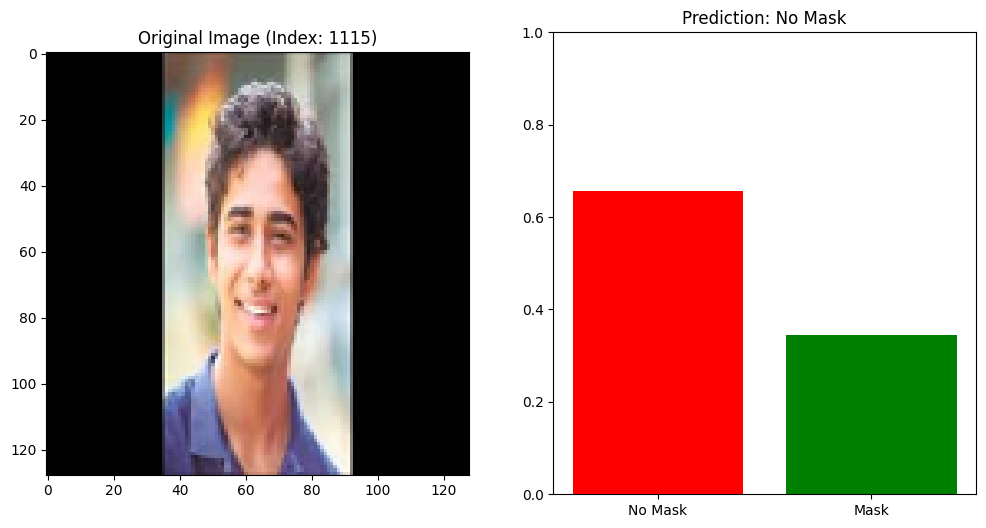

In [21]:
import cv2

# Parameters for displaying predictions
im_height, im_width = 128, 128  # Resizing dimensions

# Random predictions for test images
for i in range(10):  # Number of random samples
    index = np.random.randint(0, len(X_test))
    img = X_test[index] * 255  # De-normalize the image for visualization
    img_input = img / 255.0  # Normalize again for prediction
    img_input = img_input[np.newaxis, :, :, :]  # Add batch dimension

    pred = model.predict(img_input)[0][0]  # Predict the label

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(np.uint8(img))
    plt.title(f"Original Image (Index: {index})")

    plt.subplot(1, 2, 2)
    plt.title(f"Prediction: {'Mask' if pred > 0.5 else 'No Mask'}")
    plt.bar(['No Mask', 'Mask'], [1-pred, pred], color=['red', 'green'])
    plt.ylim(0, 1)
    plt.show()
